<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

## Importing the libraries

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler #feature scaling

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

from sklearn.ensemble import RandomForestClassifier #Random Forest

from sklearn.svm import SVC

from xgboost import XGBClassifier

import lightgbm as lgb

In [6]:
#!pip install LightGBM

## Load and Prepare Data

In [8]:
dataset = pd.read_csv('Churn.csv')

## EDA

In [10]:
dataset.sample(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8895,8896,15658972,Foster,699,France,Female,40,8,122038.34,1,1,0,102085.35,0
3738,3739,15813697,Onyekaozulu,498,Germany,Female,44,2,120702.67,2,1,1,98175.74,0
9083,9084,15711396,Henderson,427,Spain,Male,40,8,0.00,2,1,1,82870.75,0
3828,3829,15809777,Gadsden,497,Germany,Female,55,7,131778.66,1,1,1,9972.64,0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df = dataset.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [13]:
df.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4038,469,Spain,Female,31,6,0.00,1,1,0,146213.75,1
5217,724,France,Male,28,5,97612.12,1,1,1,96498.14,0
7166,618,Spain,Female,40,8,0.00,2,1,0,80204.38,0


In [14]:
df.shape

(10000, 11)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [16]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [18]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [19]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Geography'] = df['Geography'].map({'France':2,'Spain':1,'Germany':0})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


## Data Preprocessing

In [22]:
df.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2554,756,1,1,30,2,145127.85,1,0,0,7554.68,0
9868,718,2,0,43,0,93143.39,1,1,0,167554.86,0
1571,594,2,1,23,5,156267.59,1,1,0,160968.44,0


In [23]:
df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [24]:
df["Geography"].value_counts()

Geography
2    5014
0    2509
1    2477
Name: count, dtype: int64

In [25]:
df["Gender"].value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

In [26]:
df["Tenure"].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [27]:
df["NumOfProducts"].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [28]:
df["HasCrCard"].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [29]:
df["IsActiveMember"].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [30]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [31]:
df.groupby('Gender')['Age'].mean()

Gender
0    39.238389
1    38.658237
Name: Age, dtype: float64

In [32]:
df.groupby('NumOfProducts').agg({'EstimatedSalary':'min','CreditScore': 'min'})

,EstimatedSalary,CreditScore
NumOfProducts,,
1,11.58,350
2,90.07,350
3,3440.47,358
4,5669.31,376


In [33]:
df.groupby('NumOfProducts').agg({'Age':'min','EstimatedSalary': 'min'})

,Age,EstimatedSalary
NumOfProducts,,
1,18,11.58
2,18,90.07
3,21,3440.47
4,29,5669.31


In [34]:
df.groupby('Exited').agg({'Age':'mean','EstimatedSalary': 'mean', 'Balance': 'mean', 'CreditScore': 'mean'})

,Age,EstimatedSalary,Balance,CreditScore
Exited,,,,
0,37.408389,99738.391772,72745.296779,651.853196
1,44.837997,101465.677531,91108.539337,645.351497


In [35]:
df.sample(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3831,722,2,1,46,5,0.0,2,1,0,179908.71,0


In [36]:
pd.crosstab(df.Exited ,df.NumOfProducts)

NumOfProducts,1,2,3,4
Exited,,,,
0,3675,4242,46,0
1,1409,348,220,60


In [37]:
pd.crosstab(df.Exited ,df.IsActiveMember)

IsActiveMember,0,1
Exited,,
0,3547,4416
1,1302,735


In [38]:
pd.crosstab(df.Exited ,df.HasCrCard)

HasCrCard,0,1
Exited,,
0,2332,5631
1,613,1424


In [39]:
pd.crosstab(df.Exited ,df.Tenure)

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,318,803,847,796,786,803,771,851,828,771,389
1,95,232,201,213,203,209,196,177,197,213,101


In [40]:
pd.crosstab(df.Exited ,df.Gender)

Gender,0,1
Exited,,
0,3404,4559
1,1139,898


In [41]:
pd.crosstab(df.Exited ,df.Geography)

Geography,0,1,2
Exited,,,
0,1695,2064,4204
1,814,413,810


In [42]:
pd.crosstab(df[df.Exited == 1].Gender , df[df.Exited == 1].Geography)

Geography,0,1,2
Gender,,,
0,448,231,460
1,366,182,350


## Strorytelling - Visualization

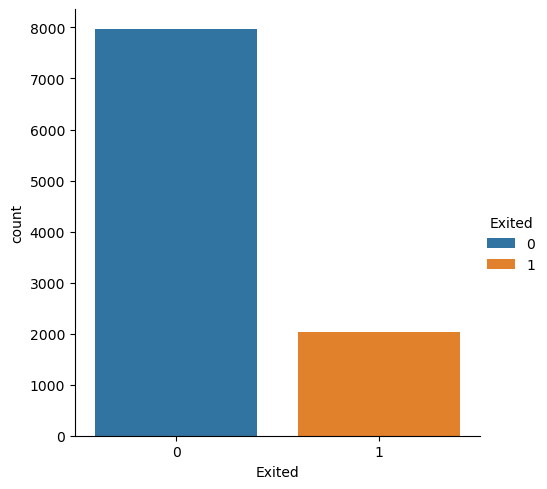

In [44]:
sns.catplot(df, x="Exited" ,hue="Exited", kind="count")

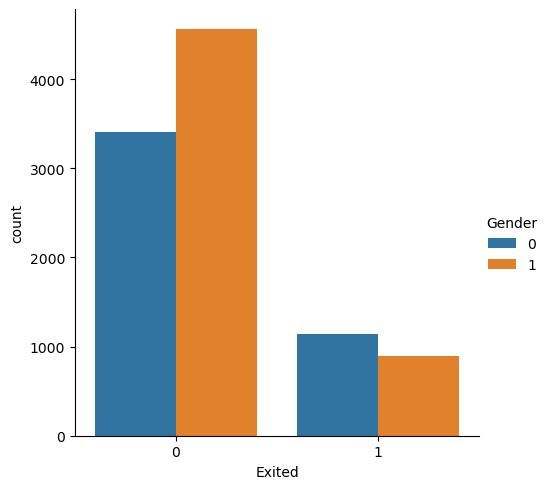

In [45]:
sns.catplot(x='Exited', hue='Gender', kind='count', data=df)

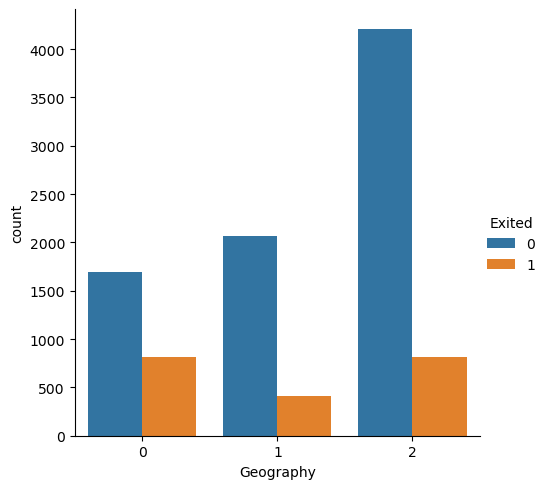

In [46]:
sns.catplot(x='Geography', hue='Exited', kind='count', data=df)

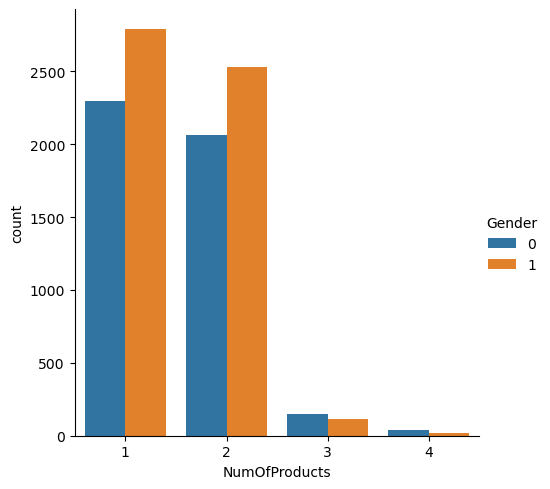

In [47]:
sns.catplot(x='NumOfProducts', hue='Gender', kind='count', data=df)

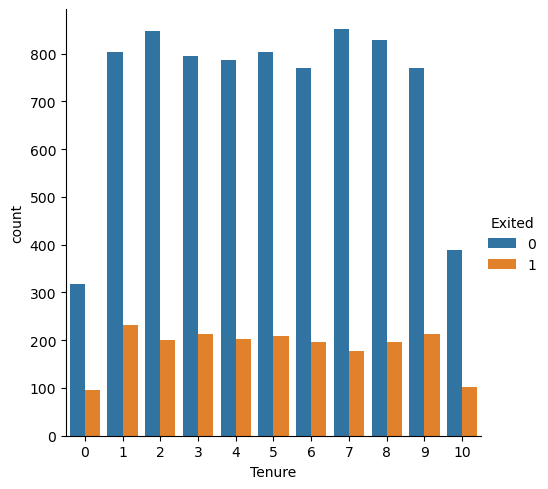

In [48]:
sns.catplot(x='Tenure', hue='Exited', kind='count', data=df)

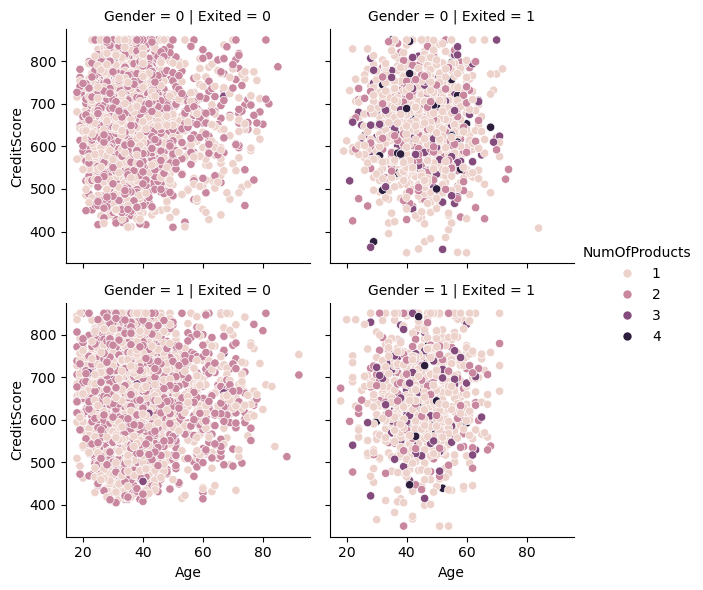

In [49]:
sns.relplot(df, x="Age", y="CreditScore", hue="NumOfProducts", col="Exited", row="Gender" , height=3, aspect=1)

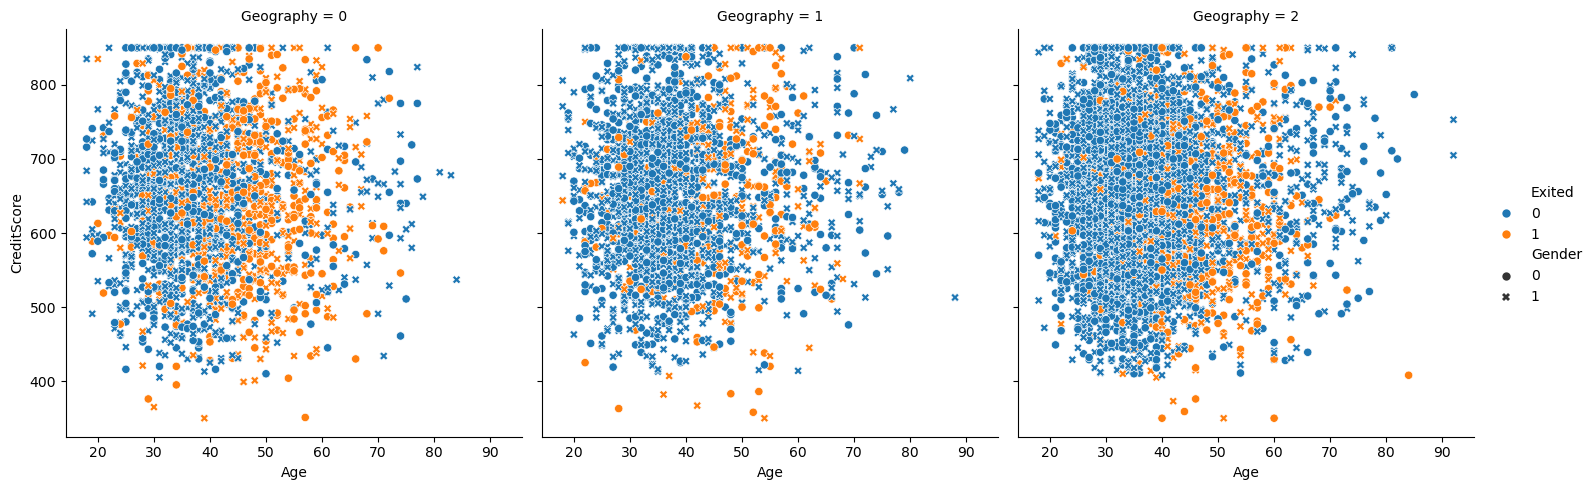

In [50]:
sns.relplot(df, x="Age", y="CreditScore", hue="Exited", style="Gender", col="Geography", col_wrap=3)

<Axes: xlabel='Age', ylabel='Count'>

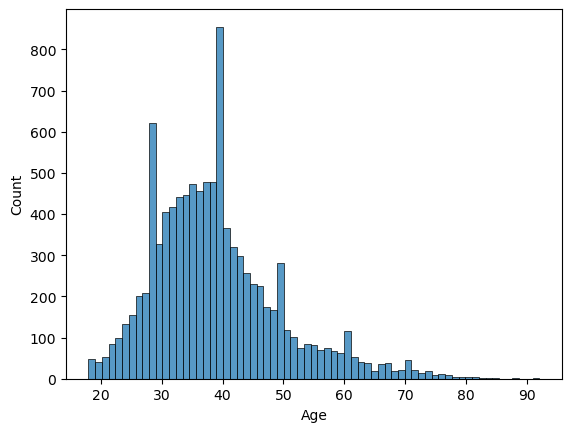

In [51]:
sns.histplot(df, x='Age')

<Axes: xlabel='Balance', ylabel='Count'>

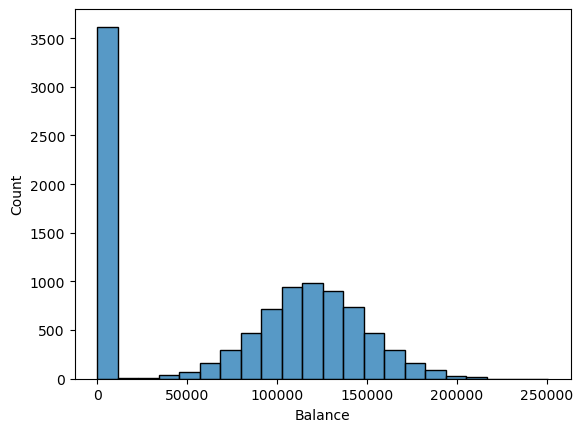

In [52]:
sns.histplot(df, x='Balance')

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

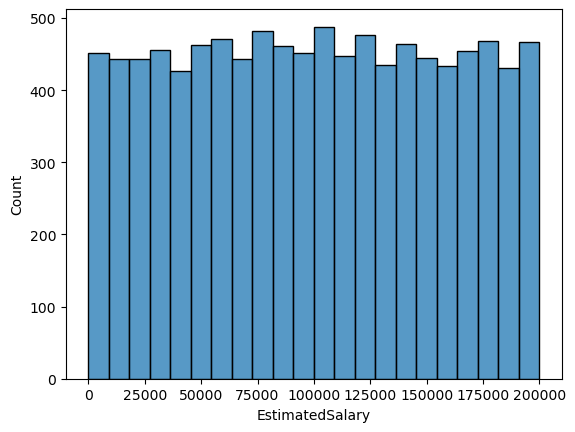

In [53]:
sns.histplot(df, x='EstimatedSalary')

<Axes: xlabel='CreditScore', ylabel='Count'>

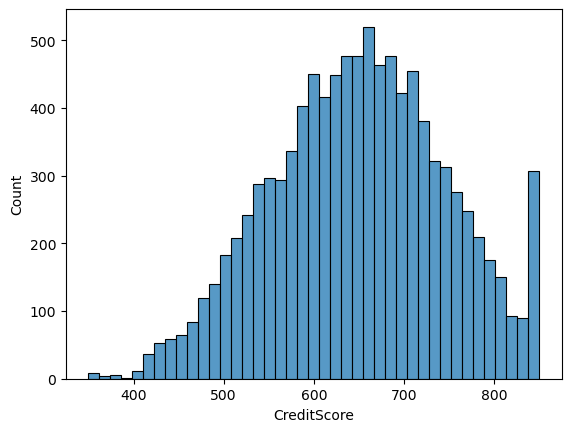

In [54]:
sns.histplot(df, x='CreditScore')

In [55]:
df.sample(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3012,849,2,0,41,9,115465.28,1,1,0,103174.5,0


In [56]:
corr = df.corr()
corr.shape

(11, 11)

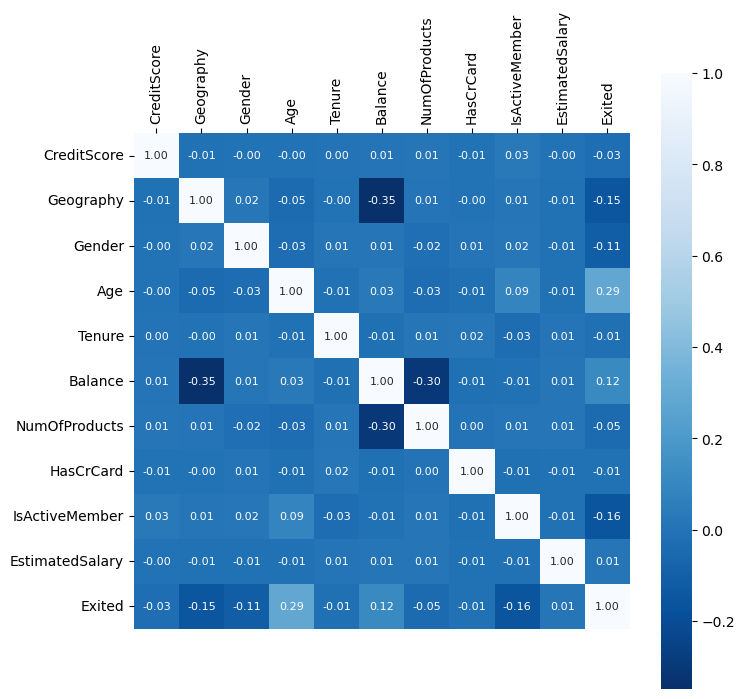

In [57]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(corr , annot=True , cbar=True, square= True, fmt='.2f', annot_kws={'size':8}, cmap='Blues_r')
ax.set(xlabel="", ylabel="")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.xaxis.tick_top()

## Prepare Data for Machine learning

In [59]:
X,y= df.drop(['Exited'], axis=1) , df[['Exited']]

In [60]:
X.sample(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1747,586,0,1,34,9,74309.81,1,1,0,15034.93


In [61]:
y.sample(1)

,Exited
1445,0


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [63]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 10)
(8000, 1)
(2000, 10)
(2000, 1)


## Train your model

## <span style="color:red ;font-size:40 ; font-weight:bold">Random Forest </span>

In [66]:
sc = StandardScaler()
X_train_RF = sc.fit_transform(X_train)
X_test_RF = sc.fit_transform(X_test)

In [67]:
rfc = RandomForestClassifier(criterion='entropy' , random_state=35)
rfc.fit(X_train_RF, y_train)

rfc_pred_train = rfc.predict(X_train_RF)
print(f'Training set evaluation F1-Score : {f1_score(y_train,rfc_pred_train)}')

Training set evaluation F1-Score : 1.0


In [68]:
rfc_pred_test = rfc.predict(X_test_RF)
print(f'Testing Set Evaluation F1-Score : {f1_score(y_test,rfc_pred_test)}')

Testing Set Evaluation F1-Score : 0.6037151702786377


In [69]:
rfc.feature_importances_

array([0.14628684, 0.03803369, 0.01961812, 0.23002526, 0.08534703,
       0.15128696, 0.12114403, 0.02014407, 0.03457036, 0.15354365])

In [70]:
df.sample(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6161,579,2,1,38,8,0.0,2,0,0,91763.67,0


In [71]:
X_train.sample(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
49,776,0,0,37,2,103769.22,2,1,0,194099.12


In [72]:
X_train_RF = X_train.drop(['CreditScore','NumOfProducts','Tenure','EstimatedSalary','HasCrCard'],axis=1)
X_test_RF = X_test.drop(['CreditScore','NumOfProducts','Tenure','EstimatedSalary','HasCrCard'],axis=1)

In [73]:
y_train_rf = y_train.copy()
y_test_rf = y_test.copy()

In [74]:
sc = StandardScaler()
X_train_rf = sc.fit_transform(X_train_RF)
X_test_rf = sc.fit_transform(X_test_RF)

In [75]:
rfc = RandomForestClassifier(criterion='entropy' , random_state=35)
rfc.fit(X_train_rf, y_train_rf)

y_pred_train_rf = rfc.predict(X_train_rf)
print(f'Training set evaluation F1-Score : {f1_score(y_train_rf,y_pred_train_rf)}')

Training set evaluation F1-Score : 0.9042518662771827


In [76]:
y_pred_rf = rfc.predict(X_test_rf)
print(f'Testing Set Evaluation F1-Score : {f1_score(y_test_rf,y_pred_rf)}')

Testing Set Evaluation F1-Score : 0.42028985507246375


In [77]:
print(confusion_matrix(y_test,rfc_pred_test))
print(classification_report(y_test_rf,y_pred_rf))

[[1549   55]
 [ 201  195]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1604
           1       0.49      0.37      0.42       396

    accuracy                           0.80      2000
   macro avg       0.67      0.64      0.65      2000
weighted avg       0.78      0.80      0.79      2000



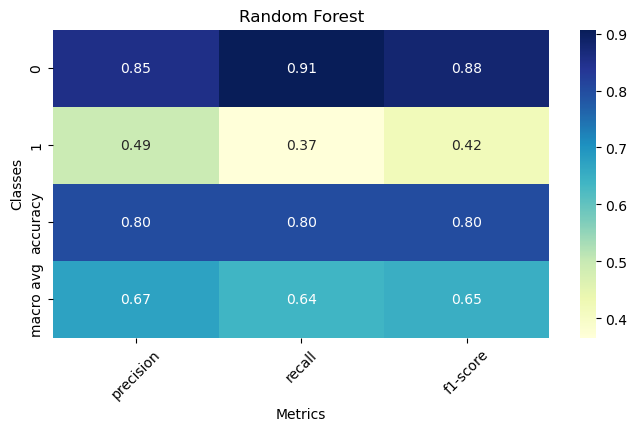

In [78]:
predictions_rf = rfc.predict(X_test_rf)

report = classification_report(y_test_rf, predictions_rf, output_dict=True)

report_df = pd.DataFrame(report).transpose()

metrics_df = report_df[['precision', 'recall', 'f1-score']]

plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df.iloc[:-1, :], annot=True, cmap='YlGnBu', fmt='.2f', cbar=True)
plt.title('Random Forest')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()

## <span style="color:red ;font-size:40 ; font-weight:bold">SVM </span>

In [80]:
df_0 = df.copy()

In [81]:
X_0 = df_0.iloc[:, 0:-1].values
y_0 = df_0.iloc[:, -1].values

In [82]:
#print(X_0[0])

In [83]:
le = LabelEncoder()
X_0[:, 1] = le.fit_transform(X_0[:, 1])

In [84]:
#print(X_0[0])

In [85]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X_0 = np.array(ct.fit_transform(X_0))

In [86]:
#print(X_0[0])

In [87]:
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X_0, y_0, test_size = 0.2, random_state = 0)

In [88]:
sc = StandardScaler()
X_train_svc = sc.fit_transform(X_train_svc)
X_test_svc = sc.transform(X_test_svc)

In [89]:
svclassifier = SVC(kernel='rbf')  #kernel='rbf' linear
svclassifier.fit(X_train_svc, y_train_svc)

SVC()

In [90]:
y_pred_svc = svclassifier.predict(X_test_svc)

In [91]:
#type(y_pred_svc)

In [92]:
#y_pred_svc.shape

In [93]:
#type(y_test_svc)

In [94]:
#y_test_svc.shape

In [95]:
#type(y_test_svc)

In [96]:
#y_test_svc.shape

In [97]:
y_test_svc = y_test_svc.ravel()

In [98]:
#y_test_svc.shape

In [99]:
pd.crosstab(y_test_svc, y_pred_svc)

col_0,0,1
row_0,,
0,1555,40
1,231,174


In [100]:
accuracy_svc = accuracy_score(y_test_svc, y_pred_svc) * 100
print(f'Accuracy is : {accuracy_svc}')

Accuracy is : 86.45


In [101]:
print(confusion_matrix(y_test_svc,y_pred_svc))
print(classification_report(y_test_svc,y_pred_svc))

[[1555   40]
 [ 231  174]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1       0.81      0.43      0.56       405

    accuracy                           0.86      2000
   macro avg       0.84      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



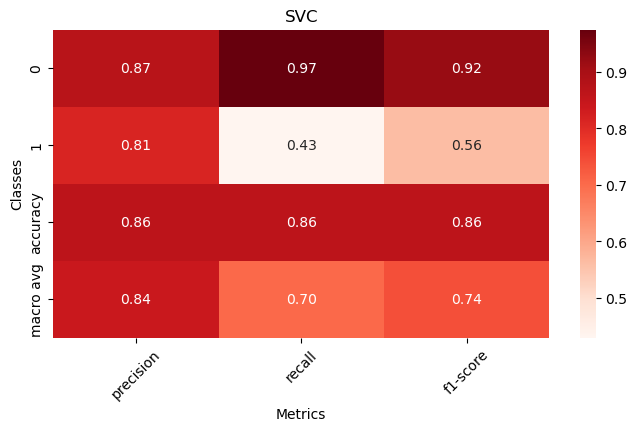

In [102]:
predictions_svc = svclassifier.predict(X_test_svc)
report = classification_report(y_test_svc, predictions_svc, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics_df = report_df[['precision', 'recall', 'f1-score']]
plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df.iloc[:-1, :], annot=True, cmap='Reds', fmt='.2f', cbar=True)
plt.title('SVC')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()

## <span style="color:red ;font-size:40 ; font-weight:bold">XGB </span>

In [104]:
X_train_xgb = X_train.drop(['CreditScore','NumOfProducts','Tenure','EstimatedSalary','HasCrCard'],axis=1)
X_test_xgb = X_test.drop(['CreditScore','NumOfProducts','Tenure','EstimatedSalary','HasCrCard'],axis=1)

In [105]:
y_train_xgb = y_train.copy()
y_test_xgb = y_test.copy()

In [106]:
sc = StandardScaler()
X_train_xgb = sc.fit_transform(X_train_xgb)
X_test_xgb = sc.fit_transform(X_test_xgb)

In [107]:
model = XGBClassifier()
model.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [108]:
y_pred_xgb = model.predict(X_test_xgb)

In [109]:
accuracy_xgb = accuracy_score(y_test_xgb, y_pred_xgb) * 100
print(f'Accuracy is : {accuracy_xgb}')

Accuracy is : 82.3


In [110]:
#pd.crosstab(y_test.ravel(), y_pred)

In [111]:
accuracy_xgb = accuracy_score(y_test_xgb, y_pred_xgb) * 100
print(f'Accuracy is : {accuracy_xgb}')

Accuracy is : 82.3


In [112]:
print(confusion_matrix(y_test_xgb,y_pred_xgb))
print(classification_report(y_test_rf,y_pred_xgb))

[[1489  115]
 [ 239  157]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1604
           1       0.58      0.40      0.47       396

    accuracy                           0.82      2000
   macro avg       0.72      0.66      0.68      2000
weighted avg       0.81      0.82      0.81      2000



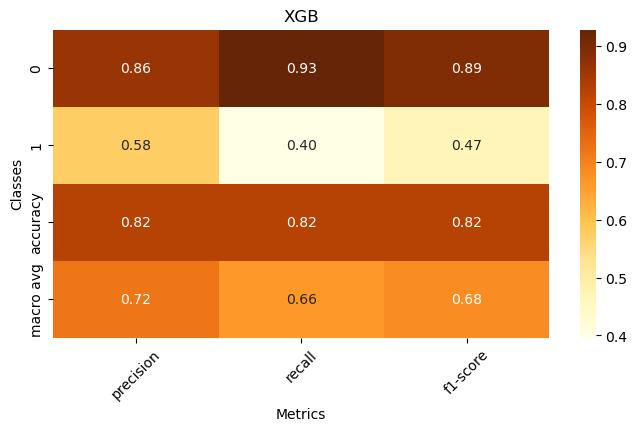

In [113]:
predictions_xgb = model.predict(X_test_xgb)
report = classification_report(y_test_xgb, predictions_xgb, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics_df = report_df[['precision', 'recall', 'f1-score']]
plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df.iloc[:-1, :], annot=True, cmap='YlOrBr', fmt='.2f', cbar=True)
plt.title('XGB')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()

## <span style="color:red ;font-size:40 ; font-weight:bold">LightGBM (Best in Pycaret)</span>

In [115]:
#dataset.sample(3)

In [116]:
#df.sample(3)

In [117]:
#dataset.sample(1)

In [118]:
df = dataset.drop(['RowNumber','CustomerId','Surname','HasCrCard','NumOfProducts','Gender','Geography','IsActiveMember'], axis=1)

In [119]:
df.sample(1)

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited
2237,622,30,2,158584.82,142342.55,1


In [120]:
XX = df.drop('Exited', axis=1)
yy = df['Exited']

In [121]:
X_train_lgb, X_test_lgb, y_train_lgb, y_test_lgb = train_test_split(XX, yy, test_size=0.2, random_state=42)

In [122]:
sc = StandardScaler()
X_train_lgb = sc.fit_transform(X_train_lgb)
X_test_lgb = sc.transform(X_test_lgb)

In [123]:
LGB = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1234, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
LGB.fit(X_train_lgb, y_train_lgb)

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267


LGBMClassifier(n_jobs=-1, random_state=1234)

In [124]:
y_pred_lgb = model.predict(X_test_lgb)

In [125]:
accuracy_lgb = accuracy_score(y_test_lgb, y_pred_lgb) * 100
print(f'Accuracy is : {accuracy_lgb}')

Accuracy is : 63.74999999999999


In [126]:
predictions_lgb = LGB.predict(X_test_lgb)
print(classification_report(y_test_lgb, predictions_lgb))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1607
           1       0.54      0.26      0.35       393

    accuracy                           0.81      2000
   macro avg       0.69      0.60      0.62      2000
weighted avg       0.78      0.81      0.78      2000



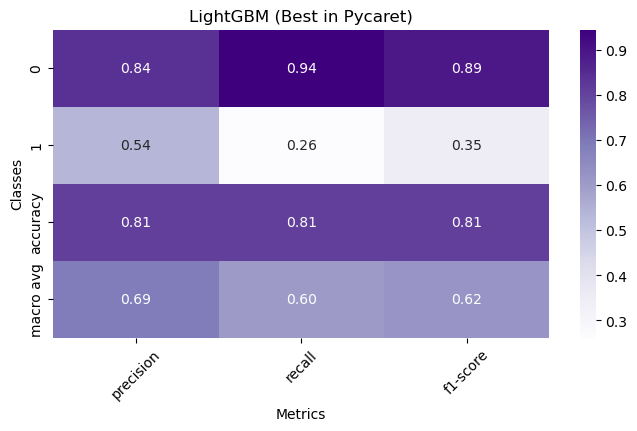

In [127]:
predictions_lgb = LGB.predict(X_test_lgb)
report = classification_report(y_test_lgb, predictions_lgb, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics_df = report_df[['precision', 'recall', 'f1-score']]
plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df.iloc[:-1, :], annot=True, cmap='Purples', fmt='.2f', cbar=True)
plt.title('LightGBM (Best in Pycaret)')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()

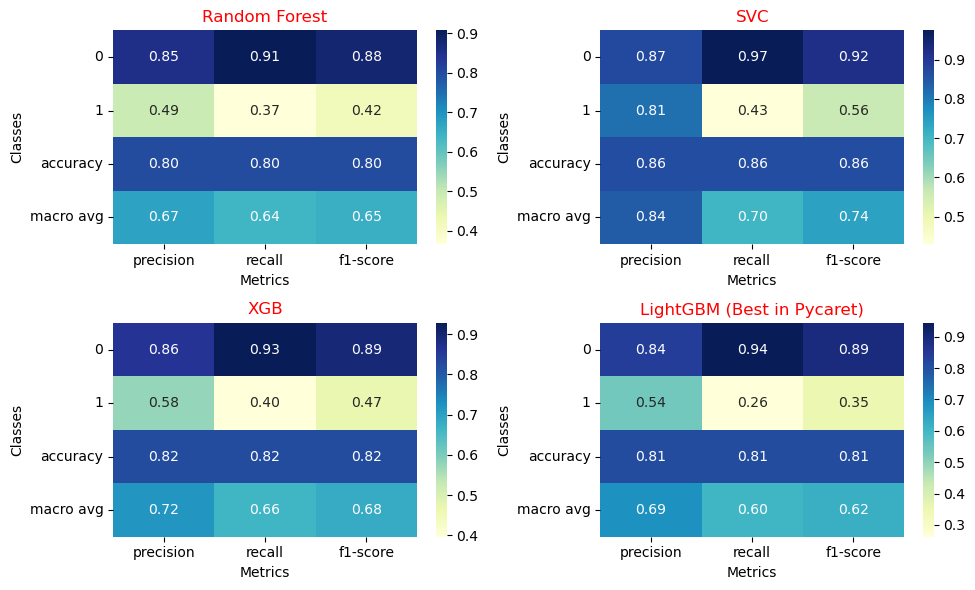

In [128]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

predictions_rf = rfc.predict(X_test_rf)
report = classification_report(y_test_rf, predictions_rf, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics_df = report_df[['precision', 'recall', 'f1-score']]
sns.heatmap(metrics_df.iloc[:-1, :], annot=True, cmap='YlGnBu', fmt='.2f', cbar=True, ax=axs[0, 0])
axs[0, 0].set_title('Random Forest',color='red')
axs[0, 0].set_ylabel('Classes')
axs[0, 0].set_xlabel('Metrics')

predictions_svc = svclassifier.predict(X_test_svc)
report = classification_report(y_test_svc, predictions_svc, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics_df = report_df[['precision', 'recall', 'f1-score']]
sns.heatmap(metrics_df.iloc[:-1, :], annot=True, cmap='YlGnBu', fmt='.2f', cbar=True, ax=axs[0, 1])
axs[0, 1].set_title('SVC',color='red')
axs[0, 1].set_ylabel('Classes')
axs[0, 1].set_xlabel('Metrics')

predictions_xgb = model.predict(X_test_xgb)
report = classification_report(y_test_xgb, predictions_xgb, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics_df = report_df[['precision', 'recall', 'f1-score']]
sns.heatmap(metrics_df.iloc[:-1, :], annot=True, cmap='YlGnBu', fmt='.2f', cbar=True, ax=axs[1, 0])
axs[1, 0].set_title('XGB',color='red')
axs[1, 0].set_ylabel('Classes')
axs[1, 0].set_xlabel('Metrics')

predictions_lgb = LGB.predict(X_test_lgb)
report = classification_report(y_test_lgb, predictions_lgb, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics_df = report_df[['precision', 'recall', 'f1-score']]
sns.heatmap(metrics_df.iloc[:-1, :], annot=True, cmap='YlGnBu', fmt='.2f', cbar=True, ax=axs[1, 1])
axs[1, 1].set_title('LightGBM (Best in Pycaret)',color='red')
axs[1, 1].set_ylabel('Classes')
axs[1, 1].set_xlabel('Metrics')

plt.tight_layout()
plt.show()